In [109]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#import the dataset
df=pd.read_csv('crime.csv',encoding='latin-1')

In [110]:
#To get the datatypes of each column
print(df.dtypes)

incident_id                 int64
offense_id                  int64
offense_code                int64
offense_code_extension      int64
offense_type_id            object
offense_category_id        object
first_occurrence_date      object
last_occurrence_date       object
reported_date              object
incident_address           object
geo_x                     float64
geo_y                     float64
geo_lon                   float64
geo_lat                   float64
district_id                object
precinct_id                 int64
neighborhood_id            object
is_crime                    int64
is_traffic                  int64
victim_count                int64
dtype: object


In [111]:
#To get the descriptive statistics of the dataset, so the data can be properly understood
print(df.shape)

(386865, 20)


In [112]:
print(df.describe())

        incident_id    offense_id   offense_code  offense_code_extension  \
count  3.868650e+05  3.868650e+05  386865.000000           386865.000000   
mean   6.179303e+09  6.179303e+15    2766.705473                0.263642   
std    1.335478e+10  1.335478e+16    1231.562483                0.669589   
min    2.019600e+04  2.019652e+10     902.000000                0.000000   
25%    2.019359e+09  2.019359e+15    2304.000000                0.000000   
50%    2.021482e+09  2.021482e+15    2399.000000                0.000000   
75%    2.023468e+09  2.023468e+15    2999.000000                0.000000   
max    2.020890e+12  2.020890e+18    7399.000000                6.000000   

              geo_x         geo_y       geo_lon        geo_lat    precinct_id  \
count  3.713620e+05  3.713620e+05  3.710960e+05  371096.000000  386865.000000   
mean   3.157516e+06  1.693963e+06 -1.049429e+02      39.730607     386.199894   
std    3.851640e+05  9.558331e+04  1.078909e+00       0.409652     183.8

In [113]:
#To convert columns to the appropriate datatypes
df['first_occurrence_date']=pd.to_datetime(df['first_occurrence_date'])
df['last_occurrence_date']=pd.to_datetime(df['last_occurrence_date'])
df['reported_date']=pd.to_datetime(df['reported_date'])


In [114]:
print(df.dtypes)

incident_id                        int64
offense_id                         int64
offense_code                       int64
offense_code_extension             int64
offense_type_id                   object
offense_category_id               object
first_occurrence_date     datetime64[ns]
last_occurrence_date      datetime64[ns]
reported_date             datetime64[ns]
incident_address                  object
geo_x                            float64
geo_y                            float64
geo_lon                          float64
geo_lat                          float64
district_id                       object
precinct_id                        int64
neighborhood_id                   object
is_crime                           int64
is_traffic                         int64
victim_count                       int64
dtype: object


In [115]:
#To get the first 5 instances of the dataset
print(df.head())

   incident_id        offense_id  offense_code  offense_code_extension  \
0    202268791   202268791299900          2999                       0   
1   2021387586  2021387586299900          2999                       0   
2   2020641486  2020641486299900          2999                       0   
3   2018612468  2018612468299900          2999                       0   
4   2020293614  2020293614299900          2999                       0   

           offense_type_id offense_category_id first_occurrence_date  \
0  criminal-mischief-other     public-disorder   2022-02-10 02:50:00   
1  criminal-mischief-other     public-disorder   2021-07-07 21:02:00   
2  criminal-mischief-other     public-disorder   2020-10-29 01:30:00   
3  criminal-mischief-other     public-disorder   2018-09-06 17:00:00   
4  criminal-mischief-other     public-disorder   2020-05-08 05:00:00   

  last_occurrence_date       reported_date     incident_address      geo_x  \
0                  NaT 2022-02-10 03:16:00  

In [116]:
#The dataset is to be cleaned. Start by checking and exterminating duplicates
print(df.duplicated().sum())

0


In [117]:
#This dataset has no duplicates. The next step is to check the null values
print(df.isnull().sum())

incident_id                    0
offense_id                     0
offense_code                   0
offense_code_extension         0
offense_type_id                0
offense_category_id            0
first_occurrence_date          0
last_occurrence_date      175556
reported_date                  0
incident_address           15503
geo_x                      15503
geo_y                      15503
geo_lon                    15769
geo_lat                    15769
district_id                   57
precinct_id                    0
neighborhood_id              689
is_crime                       0
is_traffic                     0
victim_count                   0
dtype: int64


In [119]:
#Get rid of the rows with the null values in the neighborhood_id column and the district_id column
df=df.dropna(subset=['neighborhood_id','district_id'])
print(df.shape)

(386131, 20)


In [120]:
#In this dataset, rows with no last_occurrence date are assumed to have happened only once
#So, fill in the null last_occurrence_date values with the corresponding first_occurrence_date values
df['last_occurrence_date'].fillna(df['first_occurrence_date'], inplace=True)

In [121]:
#Fill null values in the Incident Address column with NA
df['incident_address'].fillna(value='NA', inplace=True)

In [122]:
print(df.isnull().sum())

incident_id                   0
offense_id                    0
offense_code                  0
offense_code_extension        0
offense_type_id               0
offense_category_id           0
first_occurrence_date         0
last_occurrence_date          0
reported_date                 0
incident_address              0
geo_x                     15465
geo_y                     15465
geo_lon                   15465
geo_lat                   15465
district_id                   0
precinct_id                   0
neighborhood_id               0
is_crime                      0
is_traffic                    0
victim_count                  0
dtype: int64


In [123]:
print(df.columns)

Index(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'first_occurrence_date',
       'last_occurrence_date', 'reported_date', 'incident_address', 'geo_x',
       'geo_y', 'geo_lon', 'geo_lat', 'district_id', 'precinct_id',
       'neighborhood_id', 'is_crime', 'is_traffic', 'victim_count'],
      dtype='object')


In [124]:
#Let us get the difference between first occurrence time and reported time and 
#This will help comb out errors in the first occurrence time column
diff_in_report_time=df['reported_date']-df['first_occurrence_date']
df['report_time_difference']=diff_in_report_time.dt.total_seconds()/(60*60*24) #To convert it into seconds and then calculate it into days format
print(df['report_time_difference'].sort_values(ascending=False))

369199    1843.848611
342357    1826.000000
385107    1727.833333
386695    1717.584028
379935    1674.103472
             ...     
86429        0.000000
86437        0.000000
261945       0.000000
18596       -0.034028
199238      -0.325694
Name: report_time_difference, Length: 386131, dtype: float64


In [125]:
#There are 2 instances where the crime was supposedly reported before it occurred
print(df.loc[[18596,199238]])

        incident_id         offense_id  offense_code  offense_code_extension  \
18596    2020148442   2020148442299901          2999                       1   
199238  20206011172  20206011172230500          2305                       0   

                  offense_type_id       offense_category_id  \
18596   criminal-mischief-mtr-veh           public-disorder   
199238   theft-items-from-vehicle  theft-from-motor-vehicle   

       first_occurrence_date last_occurrence_date       reported_date  \
18596    2020-03-08 03:50:00  2020-03-08 03:50:00 2020-03-08 03:01:00   
199238   2020-08-24 19:05:00  2020-08-24 21:05:00 2020-08-24 11:16:00   

           incident_address  ...      geo_y     geo_lon    geo_lat  \
18596   2300 BLK E 12TH AVE  ...  1693164.0 -104.959446  39.735297   
199238       3315 WALNUT ST  ...  1704385.0 -104.977720  39.766184   

        district_id precinct_id  neighborhood_id is_crime  is_traffic  \
18596             2         213    congress-park        1        

In [126]:
#Row 18596 was reported 49 minutes before it happened, and row 199238 was reported over 7 hours before it happened
#A solution would be to switch the values in both columns, as it can be assumed as an error in data collection


In [128]:
#To create a function to switch the values in first occurrence date column and reported date column
def switch(df, index):
    column1 = 'first_occurrence_date'
    column2 = 'reported_date'
    temp = df.at[index, column1]
    df.at[index, column1] = df.at[index, column2]
    df.at[index, column2] = temp
    return df


In [129]:
#Apply the function to the dataset rows
index=18596
df=switch(df,index)

In [131]:
print(df.loc[[18596,199238]])

        incident_id         offense_id  offense_code  offense_code_extension  \
18596    2020148442   2020148442299901          2999                       1   
199238  20206011172  20206011172230500          2305                       0   

                  offense_type_id       offense_category_id  \
18596   criminal-mischief-mtr-veh           public-disorder   
199238   theft-items-from-vehicle  theft-from-motor-vehicle   

       first_occurrence_date last_occurrence_date       reported_date  \
18596    2020-03-08 03:01:00  2020-03-08 03:50:00 2020-03-08 03:50:00   
199238   2020-08-24 19:05:00  2020-08-24 21:05:00 2020-08-24 11:16:00   

           incident_address  ...      geo_y     geo_lon    geo_lat  \
18596   2300 BLK E 12TH AVE  ...  1693164.0 -104.959446  39.735297   
199238       3315 WALNUT ST  ...  1704385.0 -104.977720  39.766184   

        district_id precinct_id  neighborhood_id is_crime  is_traffic  \
18596             2         213    congress-park        1        

In [132]:
#To check the amount of unique values in each column in the dataset
print(df.nunique())

incident_id               361580
offense_id                386131
offense_code                 141
offense_code_extension         7
offense_type_id              186
offense_category_id           14
first_occurrence_date     240675
last_occurrence_date      263269
reported_date             335334
incident_address           90358
geo_x                      45210
geo_y                      43467
geo_lon                    90773
geo_lat                    90459
district_id                    8
precinct_id                   40
neighborhood_id               78
is_crime                       1
is_traffic                     1
victim_count                  18
report_time_difference     32930
dtype: int64


In [133]:
#The is_crime and is_traffic column have only one unique value. Use the valuecounts() to get a deeper understanding of the unique values
print(df['is_crime'].value_counts())


1    386131
Name: is_crime, dtype: int64


In [134]:
print(df['is_traffic'].value_counts())

0    386131
Name: is_traffic, dtype: int64


In [135]:
#Every data entry has the same value in the is_traffic and is_crime column (1, which is yes)
#So these columns can be dropped
df.drop('is_crime',axis=1,inplace=True)

In [27]:
df.drop('is_traffic',axis=1,inplace=True)

In [136]:
print(df.columns)

Index(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'first_occurrence_date',
       'last_occurrence_date', 'reported_date', 'incident_address', 'geo_x',
       'geo_y', 'geo_lon', 'geo_lat', 'district_id', 'precinct_id',
       'neighborhood_id', 'is_traffic', 'victim_count',
       'report_time_difference'],
      dtype='object')


In [137]:
#The Exploratory Data Analysis (EDA) stage
#To find the frequencies of crime in the neighbourhoods
print(df['neighborhood_id'].value_counts())


five-points     23073
central-park    17862
capitol-hill    14655
cbd             14651
dia             14641
                ...  
skyland          1155
rosedale         1099
country-club      887
indian-creek      718
wellshire         381
Name: neighborhood_id, Length: 78, dtype: int64


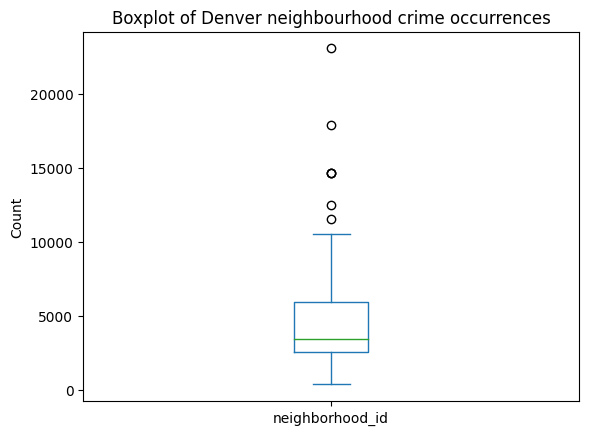

In [138]:
df['neighborhood_id'].value_counts().plot(kind='box')
plt.ylabel('Count')
plt.title('Boxplot of Denver neighbourhood crime occurrences')
plt.show()

In [139]:
#Five points is the neighbourhood with the highest crime frequency, and Wellshire is the neighbourhood with the lowest

In [140]:
print(df['offense_category_id'].value_counts())

theft-from-motor-vehicle        64567
public-disorder                 56792
larceny                         56147
auto-theft                      55879
all-other-crimes                46580
burglary                        27637
drug-alcohol                    21757
other-crimes-against-persons    20416
aggravated-assault              17181
robbery                          6959
white-collar-crime               6700
sexual-assault                   4281
arson                             825
murder                            410
Name: offense_category_id, dtype: int64


Text(0.5, 1.0, 'Offense frequencies in Denver')

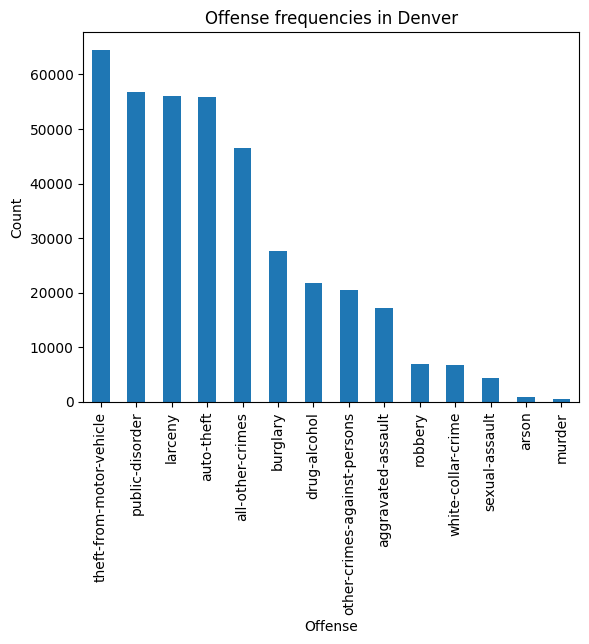

In [141]:
#Plot a bar chart with the data
df['offense_category_id'].value_counts().plot(kind='bar')
plt.xlabel('Offense')
plt.ylabel('Count')
plt.title('Offense frequencies in Denver')

In [142]:
#Theft from Motor Vehicles is the most common crime in Denver.

In [199]:
#To find the most common crime per neighbourhood
most_common_crime=df.groupby('neighborhood_id')['offense_category_id'].value_counts().groupby('neighborhood_id').idxmax()
print(most_common_crime)

neighborhood_id
athmar-park        (athmar-park, theft-from-motor-vehicle)
auraria                        (auraria, all-other-crimes)
baker                                     (baker, larceny)
barnum                          (barnum, all-other-crimes)
barnum-west                (barnum-west, all-other-crimes)
                                   ...                    
west-colfax                 (west-colfax, public-disorder)
west-highland    (west-highland, theft-from-motor-vehicle)
westwood                      (westwood, all-other-crimes)
whittier                       (whittier, public-disorder)
windsor                              (windsor, auto-theft)
Name: offense_category_id, Length: 78, dtype: object


In [143]:
#To create a new column that shows the hour of the first occurrence of the crime
df['first_occ_hour']=df['first_occurrence_date'].dt.hour
print(df['first_occ_hour'].value_counts())


17    22428
18    21870
0     21740
16    21662
12    21476
22    21383
20    21107
21    19850
15    19483
19    19472
23    17184
14    17012
8     15915
13    15697
10    13929
11    13748
1     13728
9     13024
2     11627
7     10916
3      9318
6      8692
4      7781
5      7089
Name: first_occ_hour, dtype: int64


Text(0.5, 1.0, 'Crime frequencies of Denver neighbourhoods')

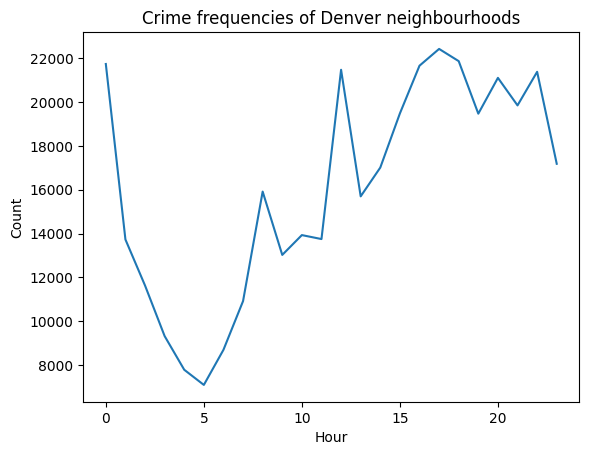

In [144]:
#Plot a line chart with the data
df['first_occ_hour'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Crime frequencies of Denver neighbourhoods')

In [194]:
#To find the crime frequencies in 5pm
fivepm=df[df['first_occ_hour']==5]
print(fivepm['offense_category_id'].value_counts())

auto-theft                      1374
theft-from-motor-vehicle        1293
public-disorder                  987
burglary                         936
larceny                          826
all-other-crimes                 694
aggravated-assault               331
other-crimes-against-persons     258
robbery                          140
drug-alcohol                     126
sexual-assault                    62
white-collar-crime                29
arson                             28
murder                             5
Name: offense_category_id, dtype: int64


In [145]:
#One can choose to be more specific and check the most common crime hour per neighbourhoood
most_time=df.groupby('neighborhood_id')['first_occ_hour'].value_counts().groupby('neighborhood_id').idxmax()
print(most_time)

neighborhood_id
athmar-park        (athmar-park, 20)
auraria                (auraria, 12)
baker                    (baker, 17)
barnum                  (barnum, 22)
barnum-west        (barnum-west, 22)
                        ...         
west-colfax        (west-colfax, 12)
west-highland    (west-highland, 20)
westwood              (westwood, 22)
whittier              (whittier, 17)
windsor                (windsor, 12)
Name: first_occ_hour, Length: 78, dtype: object


In [198]:
most_common_crime=df.groupby('neighborhood_id')['offense_category_id'].value_counts().groupby('neighborhood_id').idxmax()
print(most_common_crime)

neighborhood_id
athmar-park        (athmar-park, theft-from-motor-vehicle)
auraria                        (auraria, all-other-crimes)
baker                                     (baker, larceny)
barnum                          (barnum, all-other-crimes)
barnum-west                (barnum-west, all-other-crimes)
                                   ...                    
west-colfax                 (west-colfax, public-disorder)
west-highland    (west-highland, theft-from-motor-vehicle)
westwood                      (westwood, all-other-crimes)
whittier                       (whittier, public-disorder)
windsor                              (windsor, auto-theft)
Name: offense_category_id, Length: 78, dtype: object


In [146]:
#To find the crime with the highest average difference between reported time and first occurrence time
print(df.groupby('offense_category_id')['report_time_difference'].mean().sort_values(ascending=False))

offense_category_id
sexual-assault                  47.961713
white-collar-crime              26.077710
larceny                          6.775805
theft-from-motor-vehicle         6.032673
burglary                         5.847324
auto-theft                       3.814023
public-disorder                  3.480932
all-other-crimes                 2.835307
other-crimes-against-persons     2.349495
aggravated-assault               1.919446
arson                            1.450855
robbery                          1.074017
drug-alcohol                     0.510000
murder                           0.321936
Name: report_time_difference, dtype: float64


In [148]:
#Sexual assault is the crime with the most delayed reporting time with an average of 48 days.The 2nd highest is white collar crime with an average of 26 days

In [147]:
#To check most common month, extract the months from the datetime, and compare their frequencies 
df['crime_month']=df['first_occurrence_date'].dt.month
print(df['crime_month'].value_counts())

7     37049
8     36713
5     35449
6     34953
9     34922
1     32814
4     32142
3     31555
2     28803
10    28660
12    26894
11    26177
Name: crime_month, dtype: int64


In [149]:
#July has the highest crime occurrences of all the months. I had a suspicion that the 4th of July was a major cause of this, because the celebrations might lead into an increase in disorder
# The days were extracted from all July crime occurrences and counted to check if the times around the 4th of July had a crime increase
df['month_day']=df['first_occurrence_date'].dt.strftime('%m-%d')
month_day=list(df['month_day'])
july=[date for date in month_day if date.startswith('07')]
print(np.unique(july,return_counts=True))

(array(['07-01', '07-02', '07-03', '07-04', '07-05', '07-06', '07-07',
       '07-08', '07-09', '07-10', '07-11', '07-12', '07-13', '07-14',
       '07-15', '07-16', '07-17', '07-18', '07-19', '07-20', '07-21',
       '07-22', '07-23', '07-24', '07-25', '07-26', '07-27', '07-28',
       '07-29', '07-30', '07-31'], dtype='<U5'), array([1413, 1161, 1189, 1236, 1197, 1142, 1162, 1251, 1159, 1219, 1176,
       1221, 1146, 1189, 1175, 1182, 1120, 1166, 1220, 1214, 1196, 1242,
       1213, 1214, 1201, 1201, 1185, 1158, 1178, 1159, 1164], dtype=int64))


In [150]:
#There was a slight increase on July 4th
#The 1st of July had the most crime occurrencies. Two other months were checked for their most frequent day

In [151]:
aug=[date for date in month_day if date.startswith('08')]
print(np.unique(aug,return_counts=True))

(array(['08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07',
       '08-08', '08-09', '08-10', '08-11', '08-12', '08-13', '08-14',
       '08-15', '08-16', '08-17', '08-18', '08-19', '08-20', '08-21',
       '08-22', '08-23', '08-24', '08-25', '08-26', '08-27', '08-28',
       '08-29', '08-30', '08-31'], dtype='<U5'), array([1332, 1133, 1054, 1210, 1170, 1159, 1147, 1234, 1187, 1217, 1163,
       1136, 1128, 1217, 1218, 1254, 1207, 1194, 1213, 1250, 1161, 1165,
       1096, 1222, 1129, 1191, 1199, 1187, 1147, 1189, 1204], dtype=int64))


In [152]:
#August 1st was also the day with the highest crime occurrences.
march=[date for date in month_day if date.startswith('03')]
print(np.unique(march,return_counts=True))

(array(['03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07',
       '03-08', '03-09', '03-10', '03-11', '03-12', '03-13', '03-14',
       '03-15', '03-16', '03-17', '03-18', '03-19', '03-20', '03-21',
       '03-22', '03-23', '03-24', '03-25', '03-26', '03-27', '03-28',
       '03-29', '03-30', '03-31'], dtype='<U5'), array([1239, 1094, 1030,  989, 1004, 1028, 1021,  966, 1025, 1078, 1122,
       1004,  936,  831,  956, 1042,  998, 1006,  976, 1000, 1034, 1030,
       1053,  984, 1038, 1090,  992, 1004,  961, 1029,  995], dtype=int64))


In [153]:
#So was march.
#The frequency of each day was checked
df['day']=df['first_occurrence_date'].dt.day
print(df['day'].value_counts())


1     15275
15    12945
20    12903
5     12841
16    12833
10    12825
2     12809
23    12753
3     12714
6     12694
8     12666
4     12643
17    12637
11    12588
21    12577
7     12554
26    12535
18    12531
14    12526
28    12518
12    12515
9     12495
24    12456
19    12455
22    12450
27    12421
13    12316
25    12211
30    11504
29    11461
31     7480
Name: day, dtype: int64


In [ ]:
#The 1st of the month has the highest crime occurrences. Interestingly, the 3 lowest days of occurrences are the 29th, 30th, and 31st

In [166]:
subset=df[df['day']==1]
print(subset['offense_category_id'].value_counts())

theft-from-motor-vehicle        2775
public-disorder                 2359
larceny                         2183
auto-theft                      1907
all-other-crimes                1701
burglary                        1145
other-crimes-against-persons     763
drug-alcohol                     687
aggravated-assault               632
sexual-assault                   418
white-collar-crime               410
robbery                          244
arson                             35
murder                            16
Name: offense_category_id, dtype: int64


In [167]:
#Using Pareto analysis to extract the 'vital few'
column= subset['offense_category_id']
total_count = len(subset)
subset_sorted = column.value_counts().sort_values(ascending=False)
subset_sorted_cumsum = subset_sorted.cumsum() / total_count * 100
print(subset_sorted_cumsum)

theft-from-motor-vehicle         18.166939
public-disorder                  33.610475
larceny                          47.901800
auto-theft                       60.386252
all-other-crimes                 71.522095
burglary                         79.018003
other-crimes-against-persons     84.013093
drug-alcohol                     88.510638
aggravated-assault               92.648118
sexual-assault                   95.384615
white-collar-crime               98.068740
robbery                          99.666121
arson                            99.895254
murder                          100.000000
Name: offense_category_id, dtype: float64


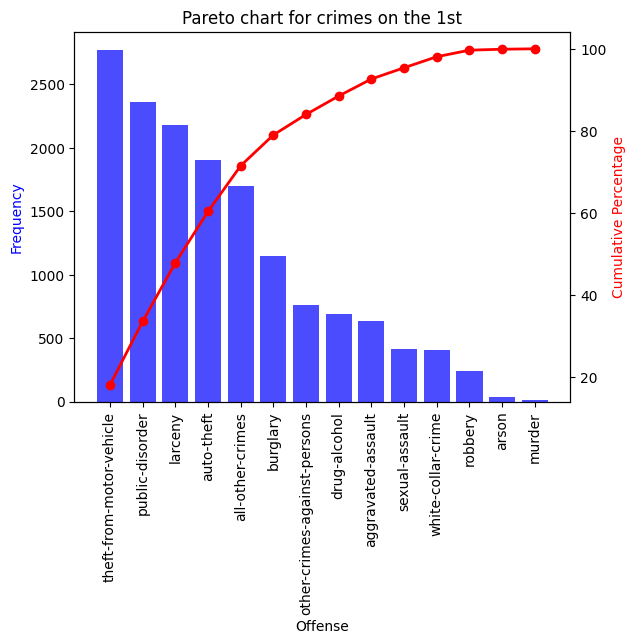

In [204]:
#Create a pareto chart
fig, ax1 = plt.subplots()

# Plot the bars
ax1.bar(subset_sorted.index, subset_sorted, color='b', alpha=0.7,align='center')
plt.xticks(rotation=90)

# Create a secondary y-axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(subset_sorted.index, subset_sorted_cumsum, color='r', marker='o',linestyle='-', linewidth=2)

ax1.set_xlabel('Offense')
ax1.set_ylabel('Frequency', color='b')
ax2.set_ylabel('Cumulative Percentage', color='r')

plt.title('Pareto chart for crimes on the 1st')

# Display the plot
plt.show()


In [71]:
victim_count=df.groupby('neighborhood_id')['victim_count'].sum().sort_values()
print(victim_count)

neighborhood_id
wellshire         383
indian-creek      723
country-club      891
rosedale         1116
skyland          1181
                ...  
dia             14743
capitol-hill    14862
cbd             14882
central-park    18068
five-points     23519
Name: victim_count, Length: 78, dtype: int64


In [74]:
victim_per_crime=df.groupby('offense_category_id')['victim_count'].mean().sort_values()
print(victim_per_crime)


offense_category_id
arson                           1.000000
auto-theft                      1.000000
burglary                        1.000000
drug-alcohol                    1.000000
larceny                         1.000000
robbery                         1.000000
theft-from-motor-vehicle        1.000000
white-collar-crime              1.000000
all-other-crimes                1.004897
public-disorder                 1.012834
sexual-assault                  1.022341
murder                          1.080097
other-crimes-against-persons    1.085961
aggravated-assault              1.290827
Name: victim_count, dtype: float64


In [73]:
print(df['offense_category_id'].value_counts())

theft-from-motor-vehicle        64640
public-disorder                 56881
larceny                         56243
auto-theft                      55953
all-other-crimes                46768
burglary                        27661
drug-alcohol                    21804
other-crimes-against-persons    20486
aggravated-assault              17213
robbery                          6972
white-collar-crime               6706
sexual-assault                   4297
arson                             829
murder                            412
Name: offense_category_id, dtype: int64


In [154]:
#To find the most common time for the crimes in Denver
df['dfhr']=df['first_occurrence_date'].dt.hour
hrtm=df.groupby('dfhr')['offense_category_id'].value_counts().groupby('offense_category_id').idxmax()
print(hrtm)

offense_category_id
aggravated-assault                        (22, aggravated-assault)
all-other-crimes                            (16, all-other-crimes)
arson                                                   (0, arson)
auto-theft                                        (22, auto-theft)
burglary                                             (0, burglary)
drug-alcohol                                    (16, drug-alcohol)
larceny                                              (12, larceny)
murder                                                 (0, murder)
other-crimes-against-persons    (20, other-crimes-against-persons)
public-disorder                               (0, public-disorder)
robbery                                              (21, robbery)
sexual-assault                                 (0, sexual-assault)
theft-from-motor-vehicle             (0, theft-from-motor-vehicle)
white-collar-crime                        (12, white-collar-crime)
Name: offense_category_id, dtype: object


In [211]:
pri=df[df['neighborhood_id']=='five-points']
print(pri['offense_category_id'].value_counts())

public-disorder                 3782
theft-from-motor-vehicle        3716
larceny                         3289
all-other-crimes                3042
auto-theft                      2286
other-crimes-against-persons    1626
drug-alcohol                    1585
burglary                        1425
aggravated-assault              1376
robbery                          406
sexual-assault                   272
white-collar-crime               188
arson                             56
murder                            24
Name: offense_category_id, dtype: int64
